In [102]:
import numpy as np
import pandas as pd
import yfinance
import matplotlib.pyplot as plt
import seaborn as sns
import indicators
%matplotlib inline

In [133]:
# Reading in stock data 
data = yfinance.download('CAL')
print(data.shape)
data['Date'] = data.index
data.reset_index(drop=True,inplace=True)
data.head()

[*********************100%***********************]  1 of 1 completed
(10129, 6)


,Open,High,Low,Close,Adj Close,Volume,Date
0,0.0,3.296296,3.203704,3.240741,0.386504,9900,1980-03-17
1,0.0,3.407408,3.277778,3.407408,0.406381,22000,1980-03-18
2,0.0,3.407408,3.388889,3.388889,0.404173,8100,1980-03-19
3,0.0,3.388889,3.370370,3.370370,0.401964,17500,1980-03-20
4,0.0,3.407408,3.388889,3.407408,0.406381,169200,1980-03-21


In [134]:
for days in [5,7,14,21,50,100]:
    data = indicators.accumulation_distribution(data,days)
    data = indicators.average_true_range(data,days)
    data = indicators.bollinger_bands(data,days)
    data = indicators.commodity_channel_index(data,days)
    data = indicators.coppock_curve(data,days)
    data = indicators.donchian_channel(data,days)
    data = indicators.ease_of_movement(data,days)
    data = indicators.exponential_moving_average(data,days)
    data = indicators.force_index(data,days)
    data = indicators.keltner_channel(data,days)
    data = indicators.macd(data,days,days)
    data = indicators.momentum(data,days)
    data = indicators.money_flow_index(data,days)
    data = indicators.moving_average(data,days)
    data = indicators.on_balance_volume(data,days)
    data = indicators.rate_of_change(data,days)
    data = indicators.relative_strength_index(data,days)
    data = indicators.standard_deviation(data,days)
    data = indicators.stochastic_oscillator_d(data,days)
    data = indicators.trix(data,days)
    data = indicators.vortex_indicator(data,days)
    
    
    
data = indicators.mass_index(data)
data = indicators.ppsr(data)
data = indicators.stochastic_oscillator_k(data)
data = indicators.ultimate_oscillator(data)    
data = indicators.chaikin_oscillator(data)

data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
print(data.shape)
data.tail()

/Users/HarrisonHoffman/Desktop/chris-harrison-ml/Trading-Research/indicators.py:552: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  dc = max(df['High'].ix[i:i + n - 1]) - min(df['Low'].ix[i:i + n - 1])


(8595, 174)


,Open,High,Low,Close,Adj Close,Volume,Date,Acc/Dist_ROC_5,ATR_5,BollingerB_5,...,PP,R1,S1,R2,S2,R3,S3,SO%k,Ultimate_Osc,Chaikin
10123,6.58,7.42,6.56,7.30,7.30,731000,2020-05-08,-8.125294,0.954262,0.293074,...,7.093333,7.626667,6.766667,7.953334,6.233333,8.486667,5.906667,0.860465,3.073002,108249.819989
10124,7.09,7.15,6.51,6.86,6.86,759900,2020-05-11,-1.058743,0.899508,0.276330,...,6.840000,7.170000,6.530000,7.480000,6.200000,7.810000,5.890000,0.546875,2.998673,90112.345717
10125,6.87,7.38,6.71,6.81,6.81,939800,2020-05-12,0.003954,0.823005,0.275241,...,6.966667,7.223333,6.553333,7.636667,6.296667,7.893333,5.883333,0.149254,2.942942,-157932.511816
10126,6.67,6.67,5.80,5.88,5.88,1547900,2020-05-13,5.866177,0.885337,0.319161,...,6.116667,6.433333,5.563334,6.986667,5.246667,7.303333,4.693334,0.091954,2.646461,-437218.901792
10127,5.67,6.31,5.35,5.91,5.91,1265100,2020-05-14,-0.599906,0.910224,0.384262,...,5.856667,6.363333,5.403333,6.816667,4.896667,7.323333,4.443333,0.583333,3.042825,-42700.192007


In [135]:
# Calculating next n day price
data['Close5'] = data['Close'].shift(-5)

# Calculating next n direction
data['Direction5'] = data['Close5'] > data['Close']
data = data.dropna()
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume,Date,Acc/Dist_ROC_5,ATR_5,BollingerB_5,...,S1,R2,S2,R3,S3,SO%k,Ultimate_Osc,Chaikin,Close5,Direction5
10113,5.14,5.69,5.14,5.54,5.54,883100,2020-04-24,0.832742,0.599843,0.187392,...,5.223333,6.006667,4.906666,6.323334,4.673333,0.727273,2.739022,230901.295277,7.32,True
10114,5.53,6.18,5.48,6.04,6.04,1219500,2020-04-27,-1.947222,0.633229,0.291358,...,5.620000,6.600000,5.200000,7.020000,4.920000,0.800000,3.268699,418965.767470,7.06,True
10115,6.11,6.58,6.06,6.32,6.32,1294700,2020-04-28,-1.000001,0.602152,0.386674,...,6.060000,6.840000,5.800000,7.100000,5.540000,0.500000,3.213605,225000.071989,6.56,True
10116,6.64,8.55,6.64,8.48,8.48,2022700,2020-04-29,-17.885149,1.144768,0.825555,...,7.230000,9.800000,5.980000,11.050000,5.319999,0.963350,4.131822,721607.604565,6.08,False
10117,7.90,8.30,7.51,8.11,8.11,1488700,2020-04-30,0.924756,1.086512,0.760839,...,7.646667,8.763333,7.183333,9.226666,6.856667,0.759493,4.410952,508584.332372,6.44,False
10118,7.62,8.05,6.90,7.32,7.32,1189100,2020-05-01,-1.438075,1.127675,0.590452,...,6.796667,8.573334,6.273333,9.096667,5.646667,0.365217,4.341525,27381.679074,7.30,False
10119,7.02,7.55,6.66,7.06,7.06,731400,2020-05-04,-62298.714804,1.048450,0.459976,...,6.630000,7.980000,6.200000,8.410000,5.739999,0.449438,4.229898,-93506.552762,6.86,False
10120,7.29,7.76,6.51,6.56,6.56,1318200,2020-05-05,-1.646991,1.115633,0.416377,...,6.126667,8.193333,5.693333,8.626667,4.876667,0.040000,3.701418,-496800.186518,6.81,True
10121,6.61,6.89,6.01,6.08,6.08,780900,2020-05-06,-1.849928,1.037089,0.438660,...,5.763333,7.206666,5.446667,7.523333,4.883334,0.079545,3.413969,-439686.318502,5.88,False
10122,6.16,6.83,6.16,6.44,6.44,1120600,2020-05-07,-0.426036,0.941392,0.296657,...,6.123333,7.146667,5.806667,7.463333,5.453333,0.417911,3.391562,-225949.378464,5.91,False


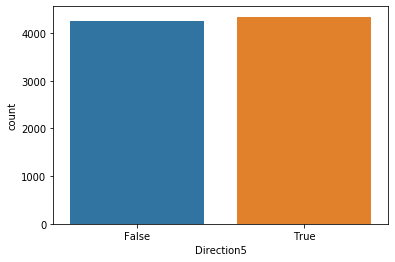

In [136]:
sns.countplot(data['Direction5'])

In [137]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [143]:
# Creating train and test set
from sklearn.model_selection import train_test_split
X,y = data.drop(['Close5','Direction5','Date'],axis=1),data['Direction5']

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_inputs = scaler.fit_transform(X)
scaled_inputs = pd.DataFrame(scaled_inputs,columns=X.columns)

X_train,X_test,y_train,y_test = train_test_split(scaled_inputs,y,test_size=.20,random_state=101)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

(6872, 173)
(6872,)
(1718, 173)
(1718,)


,Open,High,Low,Close,Adj Close,Volume,Acc/Dist_ROC_5,ATR_5,BollingerB_5,Bollinger%b_5,...,PP,R1,S1,R2,S2,R3,S3,SO%k,Ultimate_Osc,Chaikin
4728,0.281982,0.246239,0.247956,0.251340,0.207190,0.053703,0.378176,0.194075,0.221802,0.396774,...,0.248505,0.249042,0.251284,0.246795,0.251891,0.245379,0.272705,0.770832,0.363556,0.632774
2787,0.156109,0.104949,0.101527,0.100913,0.045733,0.031212,0.378176,0.091508,0.097975,0.648270,...,0.102476,0.103403,0.100500,0.105839,0.100877,0.105864,0.120537,0.222222,0.455191,0.619763
5698,0.363323,0.348981,0.323925,0.357758,0.309278,0.156981,0.378176,0.404061,0.094668,0.921956,...,0.343649,0.362933,0.338605,0.367996,0.319638,0.383531,0.330736,1.000000,0.680486,0.699657
6577,0.255854,0.210730,0.214191,0.211473,0.220662,0.040871,0.378176,0.085997,0.028730,0.035445,...,0.212119,0.210092,0.214022,0.208741,0.217322,0.205156,0.238116,0.242424,0.756959,0.573492
1683,0.353299,0.309862,0.322811,0.318209,0.052200,0.002712,0.378176,0.034778,0.006340,0.687500,...,0.316912,0.311145,0.324538,0.304235,0.331598,0.296364,0.355443,1.000000,0.341672,0.618877


In [144]:
# Network time
model = Sequential()
model.add(Dense(100, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=500, batch_size=100, verbose=2)

Train on 6872 samples, validate on 1718 samples
Epoch 1/500
 - 0s - loss: 0.6943 - accuracy: 0.5095 - val_loss: 0.6927 - val_accuracy: 0.5047
Epoch 2/500
 - 0s - loss: 0.6931 - accuracy: 0.5148 - val_loss: 0.6902 - val_accuracy: 0.5396
Epoch 3/500
 - 0s - loss: 0.6910 - accuracy: 0.5183 - val_loss: 0.6923 - val_accuracy: 0.5192
Epoch 4/500
 - 0s - loss: 0.6915 - accuracy: 0.5212 - val_loss: 0.6916 - val_accuracy: 0.5169
Epoch 5/500
 - 0s - loss: 0.6916 - accuracy: 0.5269 - val_loss: 0.6906 - val_accuracy: 0.5518
Epoch 6/500
 - 0s - loss: 0.6902 - accuracy: 0.5322 - val_loss: 0.6913 - val_accuracy: 0.5349
Epoch 7/500
 - 0s - loss: 0.6895 - accuracy: 0.5346 - val_loss: 0.6894 - val_accuracy: 0.5373
Epoch 8/500
 - 0s - loss: 0.6887 - accuracy: 0.5387 - val_loss: 0.6880 - val_accuracy: 0.5454
Epoch 9/500
 - 0s - loss: 0.6886 - accuracy: 0.5407 - val_loss: 0.6875 - val_accuracy: 0.5495
Epoch 10/500
 - 0s - loss: 0.6878 - accuracy: 0.5314 - val_loss: 0.6895 - val_accuracy: 0.5151
Epoch 11/50

Epoch 87/500
 - 0s - loss: 0.5748 - accuracy: 0.6788 - val_loss: 0.6790 - val_accuracy: 0.5978
Epoch 88/500
 - 0s - loss: 0.5743 - accuracy: 0.6847 - val_loss: 0.6684 - val_accuracy: 0.6030
Epoch 89/500
 - 0s - loss: 0.5629 - accuracy: 0.6922 - val_loss: 0.6798 - val_accuracy: 0.6013
Epoch 90/500
 - 0s - loss: 0.5588 - accuracy: 0.6937 - val_loss: 0.7004 - val_accuracy: 0.5990
Epoch 91/500
 - 0s - loss: 0.5677 - accuracy: 0.6832 - val_loss: 0.6639 - val_accuracy: 0.6019
Epoch 92/500
 - 0s - loss: 0.5545 - accuracy: 0.7002 - val_loss: 0.6896 - val_accuracy: 0.5995
Epoch 93/500
 - 0s - loss: 0.5636 - accuracy: 0.6864 - val_loss: 0.6763 - val_accuracy: 0.6024
Epoch 94/500
 - 0s - loss: 0.5659 - accuracy: 0.6912 - val_loss: 0.6583 - val_accuracy: 0.6059
Epoch 95/500
 - 0s - loss: 0.5544 - accuracy: 0.6995 - val_loss: 0.6995 - val_accuracy: 0.5960
Epoch 96/500
 - 0s - loss: 0.5563 - accuracy: 0.6914 - val_loss: 0.7107 - val_accuracy: 0.5966
Epoch 97/500
 - 0s - loss: 0.5572 - accuracy: 0.69

Epoch 173/500
 - 0s - loss: 0.3827 - accuracy: 0.8177 - val_loss: 0.7497 - val_accuracy: 0.6333
Epoch 174/500
 - 0s - loss: 0.3824 - accuracy: 0.8182 - val_loss: 0.7625 - val_accuracy: 0.6461
Epoch 175/500
 - 0s - loss: 0.3993 - accuracy: 0.8019 - val_loss: 0.7823 - val_accuracy: 0.6484
Epoch 176/500
 - 0s - loss: 0.3934 - accuracy: 0.8097 - val_loss: 0.7556 - val_accuracy: 0.6554
Epoch 177/500
 - 0s - loss: 0.3790 - accuracy: 0.8181 - val_loss: 0.7411 - val_accuracy: 0.6519
Epoch 178/500
 - 0s - loss: 0.3863 - accuracy: 0.8117 - val_loss: 0.7344 - val_accuracy: 0.6583
Epoch 179/500
 - 0s - loss: 0.4058 - accuracy: 0.8136 - val_loss: 0.7009 - val_accuracy: 0.6630
Epoch 180/500
 - 0s - loss: 0.3739 - accuracy: 0.8210 - val_loss: 0.7586 - val_accuracy: 0.6607
Epoch 181/500
 - 0s - loss: 0.3902 - accuracy: 0.8114 - val_loss: 0.7766 - val_accuracy: 0.6426
Epoch 182/500
 - 0s - loss: 0.3927 - accuracy: 0.8095 - val_loss: 0.7382 - val_accuracy: 0.6513
Epoch 183/500
 - 0s - loss: 0.3840 - acc

Epoch 259/500
 - 0s - loss: 0.2680 - accuracy: 0.8779 - val_loss: 0.8753 - val_accuracy: 0.6735
Epoch 260/500
 - 0s - loss: 0.2658 - accuracy: 0.8814 - val_loss: 0.8960 - val_accuracy: 0.6764
Epoch 261/500
 - 0s - loss: 0.2604 - accuracy: 0.8855 - val_loss: 0.9267 - val_accuracy: 0.6630
Epoch 262/500
 - 0s - loss: 0.2606 - accuracy: 0.8836 - val_loss: 0.9495 - val_accuracy: 0.6583
Epoch 263/500
 - 0s - loss: 0.2799 - accuracy: 0.8804 - val_loss: 0.9278 - val_accuracy: 0.6740
Epoch 264/500
 - 0s - loss: 0.2609 - accuracy: 0.8866 - val_loss: 0.8908 - val_accuracy: 0.6752
Epoch 265/500
 - 0s - loss: 0.2622 - accuracy: 0.8821 - val_loss: 0.9108 - val_accuracy: 0.6711
Epoch 266/500
 - 0s - loss: 0.2691 - accuracy: 0.8824 - val_loss: 1.0159 - val_accuracy: 0.6607
Epoch 267/500
 - 0s - loss: 0.2619 - accuracy: 0.8837 - val_loss: 0.9472 - val_accuracy: 0.6729
Epoch 268/500
 - 0s - loss: 0.2583 - accuracy: 0.8823 - val_loss: 0.9400 - val_accuracy: 0.6694
Epoch 269/500
 - 0s - loss: 0.2720 - acc

Epoch 345/500
 - 0s - loss: 0.2110 - accuracy: 0.9120 - val_loss: 1.2297 - val_accuracy: 0.6682
Epoch 346/500
 - 0s - loss: 0.2102 - accuracy: 0.9125 - val_loss: 1.0818 - val_accuracy: 0.6775
Epoch 347/500
 - 0s - loss: 0.1963 - accuracy: 0.9204 - val_loss: 1.1355 - val_accuracy: 0.6705
Epoch 348/500
 - 0s - loss: 0.1991 - accuracy: 0.9176 - val_loss: 1.2009 - val_accuracy: 0.6816
Epoch 349/500
 - 0s - loss: 0.1902 - accuracy: 0.9210 - val_loss: 1.1464 - val_accuracy: 0.6787
Epoch 350/500
 - 0s - loss: 0.1900 - accuracy: 0.9219 - val_loss: 1.2017 - val_accuracy: 0.6799
Epoch 351/500
 - 0s - loss: 0.1817 - accuracy: 0.9233 - val_loss: 1.1688 - val_accuracy: 0.6630
Epoch 352/500
 - 0s - loss: 0.1776 - accuracy: 0.9264 - val_loss: 1.1186 - val_accuracy: 0.6845
Epoch 353/500
 - 0s - loss: 0.1802 - accuracy: 0.9255 - val_loss: 1.1253 - val_accuracy: 0.6874
Epoch 354/500
 - 0s - loss: 0.1805 - accuracy: 0.9256 - val_loss: 1.1056 - val_accuracy: 0.6804
Epoch 355/500
 - 0s - loss: 0.1755 - acc

Epoch 431/500
 - 0s - loss: 0.1355 - accuracy: 0.9459 - val_loss: 1.3803 - val_accuracy: 0.6845
Epoch 432/500
 - 0s - loss: 0.1375 - accuracy: 0.9473 - val_loss: 1.3731 - val_accuracy: 0.6903
Epoch 433/500
 - 0s - loss: 0.1345 - accuracy: 0.9486 - val_loss: 1.3620 - val_accuracy: 0.6892
Epoch 434/500
 - 0s - loss: 0.1194 - accuracy: 0.9569 - val_loss: 1.4288 - val_accuracy: 0.6775
Epoch 435/500
 - 0s - loss: 0.1399 - accuracy: 0.9435 - val_loss: 1.3669 - val_accuracy: 0.6839
Epoch 436/500
 - 0s - loss: 0.1409 - accuracy: 0.9462 - val_loss: 1.4471 - val_accuracy: 0.6851
Epoch 437/500
 - 0s - loss: 0.1376 - accuracy: 0.9441 - val_loss: 1.4330 - val_accuracy: 0.6729
Epoch 438/500
 - 0s - loss: 0.1385 - accuracy: 0.9444 - val_loss: 1.4039 - val_accuracy: 0.6735
Epoch 439/500
 - 0s - loss: 0.1302 - accuracy: 0.9478 - val_loss: 1.4047 - val_accuracy: 0.6880
Epoch 440/500
 - 0s - loss: 0.1399 - accuracy: 0.9457 - val_loss: 1.3456 - val_accuracy: 0.6793
Epoch 441/500
 - 0s - loss: 0.1404 - acc

In [145]:
preds = model.predict(X_test)
preds = [i > .50 for i in preds]
predicted = []
for pred in preds:
    val = pred[0]
    predicted.append(val)

In [146]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test,predicted))

              precision    recall  f1-score   support

       False       0.66      0.72      0.69       852
        True       0.70      0.64      0.67       866

    accuracy                           0.68      1718
   macro avg       0.68      0.68      0.68      1718
weighted avg       0.68      0.68      0.68      1718

[[614 238]
 [313 553]]


In [ ]:
import matplotlib.pyplot as plt

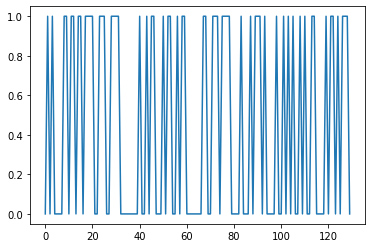

In [40]:
x = np.arange(0,130,1)
plt.plot(x,y_test)